         Date Slot No.      RefSt  Sensor_O3       Temp     RelHum
0  16-12-2021  SLOT-13  29.971379  82.909091  42.937931  25.986207
1  16-12-2021  SLOT-14  27.227667  75.576271  37.216667  30.165000
2  16-12-2021  SLOT-15  25.933559  74.271186  36.057627  31.477966
3  16-12-2021  SLOT-16  23.975000  73.344828  35.470000  31.477966
4  16-12-2021  SLOT-17  43.052712  86.263158  34.900000  35.988136
Loss functions:
* R-squared = -16.426398215707113
* RMSE = 3436.069575820867
* MAE = 55.746246736511154
         Date Slot No.      RefSt  Sensor_O3       Temp     RelHum
0  16-12-2021  SLOT-13  29.971379  82.909091  42.937931  25.986207
1  16-12-2021  SLOT-14  27.227667  75.576271  37.216667  30.165000
2  16-12-2021  SLOT-15  25.933559  74.271186  36.057627  31.477966
3  16-12-2021  SLOT-16  23.975000  73.344828  35.470000  31.477966
4  16-12-2021  SLOT-17  43.052712  86.263158  34.900000  35.988136
Date          object
Slot No.      object
RefSt        float64
Sensor_O3    float64
Temp    

<ipython-input-9-293bacd1090e>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]


Correlation:  0.4895684851143656


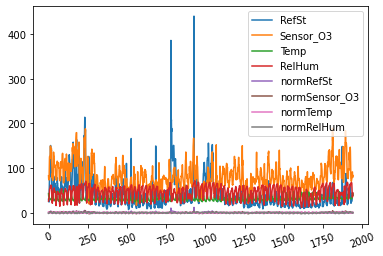

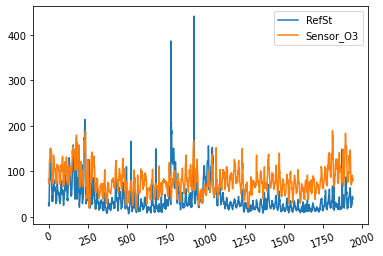

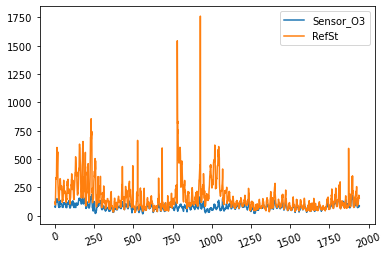

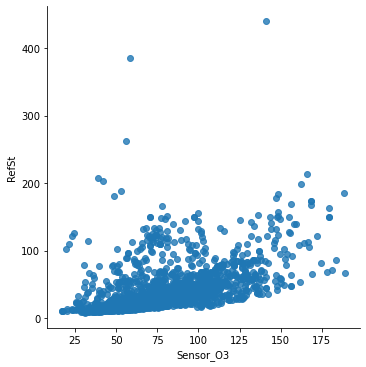

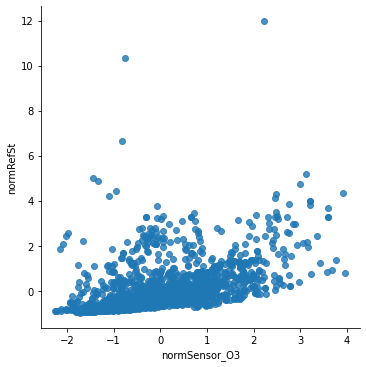

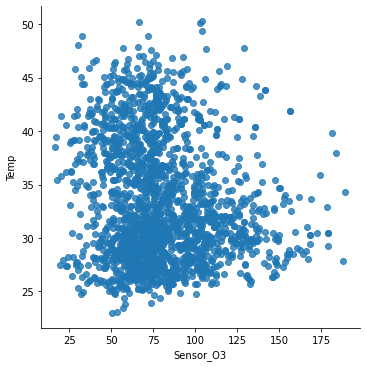

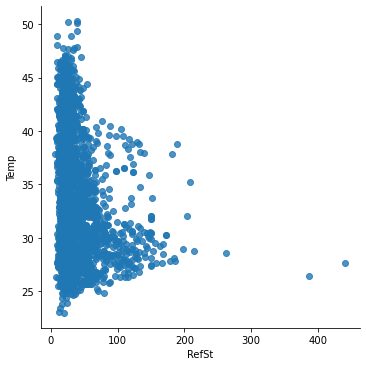

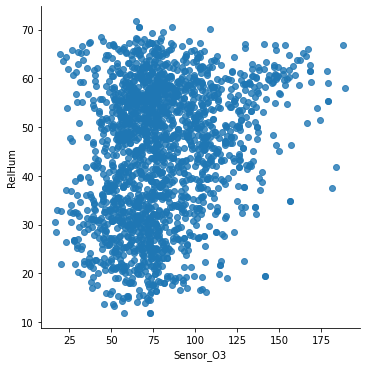

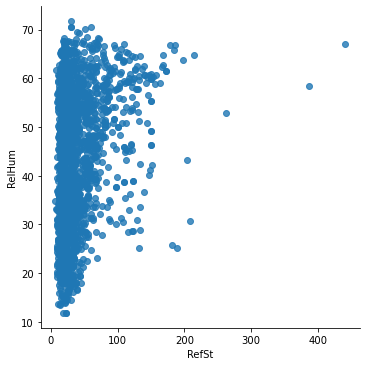

In [9]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime

#%%
# Read sensor data
sensor = pd.read_csv("PM10_RM.csv")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'RefSt': sensor["RefSt"], 'Sensor_O3': sensor["Sensor_O3"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})

# Split main dataset and build train and test datasets
X = df[['Sensor_O3', 'Temp', 'RelHum']]
Y = df['RefSt']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'RefSt': Y_train, 'Sensor_O3': X_train["Sensor_O3"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'RefSt': Y_test, 'Sensor_O3': X_test["Sensor_O3"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    print("* RMSE =", mean_squared_error(y_true, y_pred))
    print("* MAE =", mean_absolute_error(y_true, y_pred))

    
# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["Sensor_O3"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normRefSt"] = normalize(df["RefSt"])
df["normSensor_O3"] = normalize(df["Sensor_O3"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Sensor_O3 = sensor[["Temp", "Sensor_O3"]]
print(Temp_Sensor_O3.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["RefSt", "Sensor_O3"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Sensor_O3_RefSt_factor = df[["Sensor_O3", "RefSt"]]
Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]
Sensor_O3_RefSt_factor.plot()
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Sensor_O3', y = 'RefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normSensor_O3', y = 'normRefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["RefSt"].tolist()
x = pd.Series(x)

y = df["Sensor_O3"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -128.41613986647818
Coefficients: 
 [0.63341487 2.11394825 1.25908807]
Loss functions:
* R-squared = -4.220844747388875
* RMSE = 1029.4259074383933
* MAE = 27.625103944791377
Intercept: 
 [46.12015553]
Coefficients: 
 [17.43350683  6.90027378 10.37491934]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -3.1338329291043214
* RMSE = 815.093135334131
* MAE = 25.138442411030773
Correlation_MLR_Pred:  0.69699049569606
Correlation_MLR_SGD_Pred:  0.7309606019224768


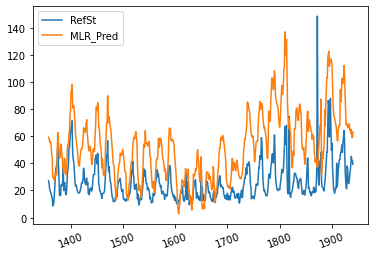

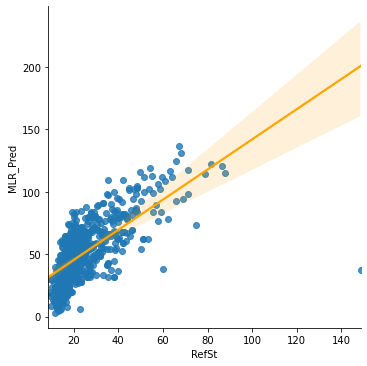

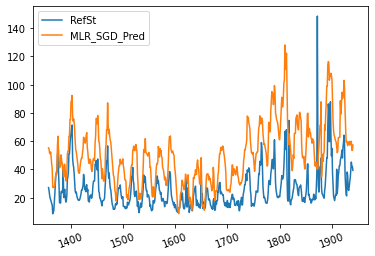

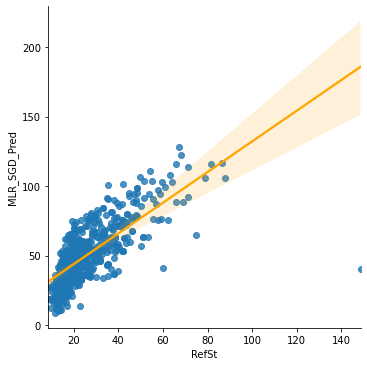

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Sensor_O3"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["RefSt", "MLR_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["RefSt", "MLR_SGD_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_SGD_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

          RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1358  27.104773  82.135593  29.831818  57.736364  59.367853     55.268703   
1359  24.870444  80.610169  29.317778  58.651111  58.466720     54.390745   
1360  21.832051  74.084746  28.492308  61.571795  56.265816     51.581481   
1361  19.658500  74.525424  28.137500  61.082500  55.178838     51.021012   
1362  18.557105  77.644068  27.921053  60.610526  56.102418     52.325556   
...         ...        ...        ...        ...        ...           ...   
1936  39.858333  91.508475  40.686667  36.980000  62.117274     58.366758   
1937  45.188833  91.389831  43.206667  35.005000  64.882573     59.906594   
1938  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1939  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1940  39.270000  83.305085  39.293333  44.260000  63.141851     57.250199   

       KNN_Pred  
1358  40.841590  
1359  49.418938  
1360  65.090658  
136

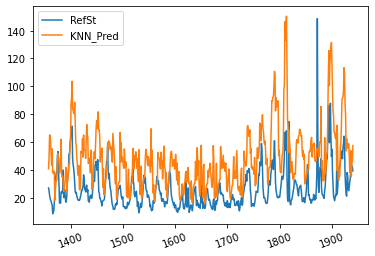

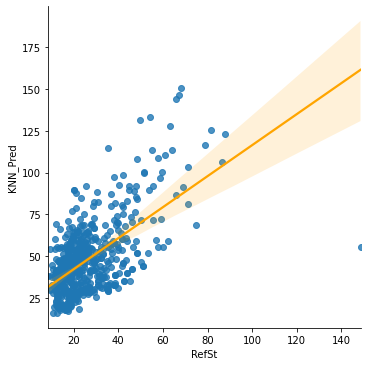

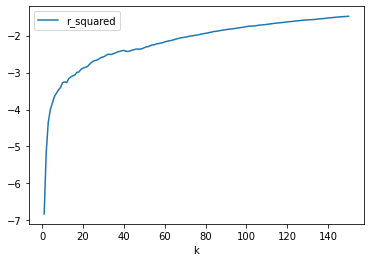

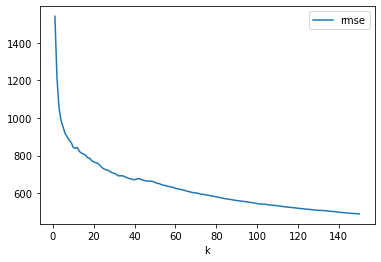

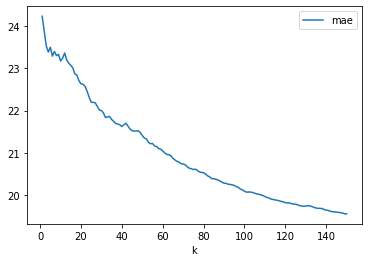

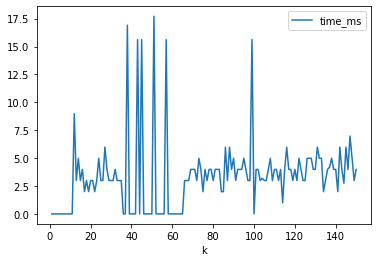

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "KNN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'RefSt': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["KNN_Pred"].corr(x)
print("Correlation: ", corr)

          RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1358  27.104773  82.135593  29.831818  57.736364  59.367853     55.268703   
1359  24.870444  80.610169  29.317778  58.651111  58.466720     54.390745   
1360  21.832051  74.084746  28.492308  61.571795  56.265816     51.581481   
1361  19.658500  74.525424  28.137500  61.082500  55.178838     51.021012   
1362  18.557105  77.644068  27.921053  60.610526  56.102418     52.325556   
...         ...        ...        ...        ...        ...           ...   
1936  39.858333  91.508475  40.686667  36.980000  62.117274     58.366758   
1937  45.188833  91.389831  43.206667  35.005000  64.882573     59.906594   
1938  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1939  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1940  39.270000  83.305085  39.293333  44.260000  63.141851     57.250199   

       KNN_Pred    RF_Pred  
1358  40.841590  79.729201  
1359  49.418938  

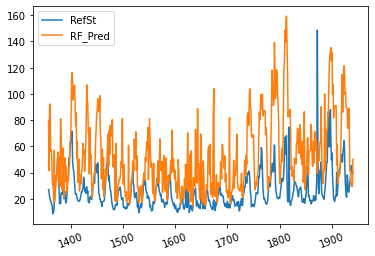

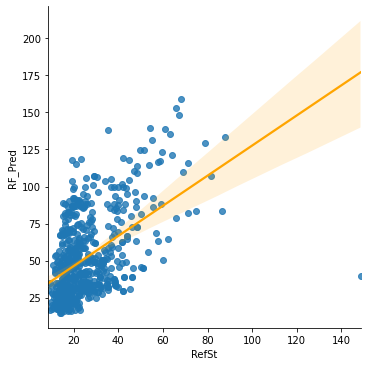

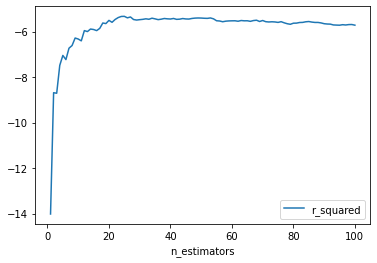

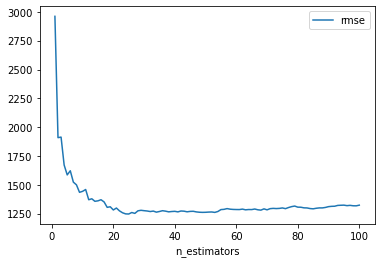

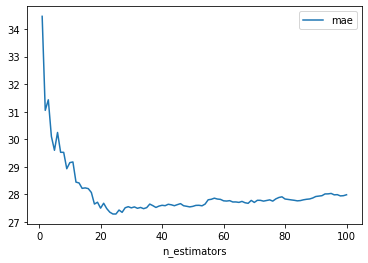

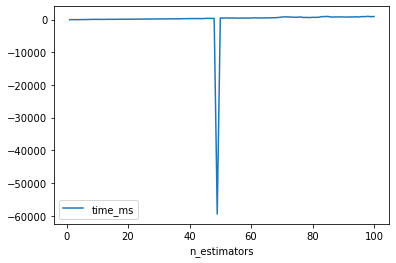

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "RF_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'RefSt': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

Loss functions:
* R-squared = -2.5633163504416983
* RMSE = 702.6008902827627
* MAE = 21.997163524201596
Loss functions:
* R-squared = -4.145177070525729
* RMSE = 1014.5060485482095
* MAE = 27.4417282999607
Correlation:  1 0.6980970551228904
Correlation:  2 0.652511435104591
Correlation:  3 0.5830876896858938
Correlation:  4 0.43037968783961544
Correlation:  5 0.5114812569362062
Correlation:  6 0.5093162154287134
Correlation:  7 -0.05742759030619349
Correlation:  8 -0.22521365909517307
Correlation:  9 -0.08873054921346342
Correlation:  10 0.29140460744506663
Correlation:  11 0.297692604630577
Correlation:  12 0.29309151939556016
Correlation:  13 -0.16738391070587672
Correlation:  14 -0.28727799385597047
Correlation:  15 -0.28445381095390204
Correlation:  16 -0.2714504865252855
Correlation:  17 -0.2655040225570491


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.25479e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


Correlation:  18 -0.26807931990141887


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.71253e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


Correlation:  19 -0.23863870810162696


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.12399e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


Correlation:  20 0.028063486143311014


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.9865e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


Correlation:  21 0.2142769570897643


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  22 -0.20531902091419316


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  23 0.1825290867937565


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  24 -0.23762646736733767


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  25 0.26609509984618207
           r_squared          rmse            mae   time_ms
degree                                                     
1      -4.145177e+00  1.014506e+03      27.441728   103.722
2      -5.944242e+00  1.369239e+03      29.325212   113.696
3      -3.993189e+00  9.845377e+02      25.281810   290.678
4      -3.718403e+00  9.303564e+02      24.650831   272.553
5      -7.541357e+00  1.684152e+03      28.682920   304.767
6      -9.160235e+00  2.003356e+03      29.216159   281.445
7      -3.349810e+01  6.802201e+03      31.773305   352.055
8      -1.228150e+02  2.441336e+04      42.924279   302.163
9      -8.509301e+01  1.697549e+04      44.306384   330.375
10     -1.586584e+04  3.128562e+06     198.721986   326.420
11     -2.136337e+05  4.212365e+07     632.805327   295.842
12     -1.686647e+05  3.325685e+07     630.352536   305.990
13     -7.588065e+05  1.496187e+08    1278.632768   288.612
14     -6.790968e+06  1.339017e+09    3127.300682   318.148
15 

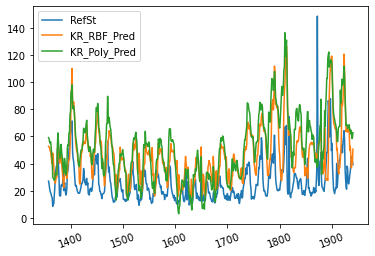

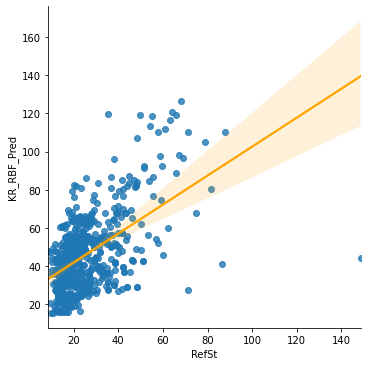

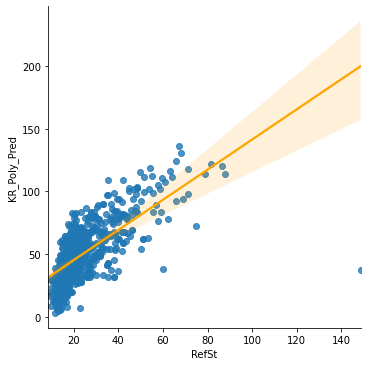

In [5]:
# %%
# Kernel Regression
# from sklearn_extensions.kernel_regression import KernelRegression
from sklearn.kernel_ridge import KernelRidge

# Models
kr_rbf = KernelRidge(kernel = "rbf")
kr_poly = KernelRidge(kernel = "poly", degree = 1)

# Fit
kr_rbf.fit(X_train, Y_train)
kr_poly.fit(X_train, Y_train)

# Predict
df_test["KR_RBF_Pred"] = kr_rbf.predict(X_test)
df_test["KR_Poly_Pred"] = kr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "KR_RBF_Pred", "KR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'KR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_Poly_Pred"])


# %%
# Polynomial Kernel Regression stats vs. hyperparameters
def kr_stats():
    kr_aux = pd.DataFrame({'RefSt': Y_test})

    degree = [*range(1, 26, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in degree:
        kr = KernelRidge(kernel = "poly", degree = i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        kr.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        kr_aux["KR_Pred"] = kr.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = kr_aux["KR_Pred"].corr(x)
        print("Correlation: ",i, corr)
#         print("type",type(kr_aux["KR_Pred"]))

        # Loss
        r_squared.append(r2_score(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        rmse.append(mean_squared_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        mae.append(mean_absolute_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        time_ms.append(execution_time)

    kr_stats = pd.DataFrame({'degree': degree, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    kr_stats = kr_stats.set_index('degree') # index column (X axis for the plots)
    print(kr_stats)

#     # plot
#     kr_stats[["r_squared"]].plot()
#     kr_stats[["rmse"]].plot()
#     kr_stats[["mae"]].plot()
#     kr_stats[["time_ms"]].plot()

kr_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_poly = df_test["KR_Poly_Pred"].corr(x)
corr_rbf = df_test["KR_RBF_Pred"].corr(x)
print("Correlation_poly: ", corr_poly)
print("Correlation_rbf: ", corr_rbf)

In [ ]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 150, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_rbf.fit(X_train, Y_train)
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test)
df_test["GP_DPWK_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["RefSt", "GP_RBF_Pred", "GP_DPWK_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'GP_DPWK_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_DPWK_Pred"])


# %%
# Gaussian Process stats vs. hyperparameters
def gp_stats():
    gp_aux = pd.DataFrame({'RefSt': Y_test})

    alpha = [*range(20, 202, 2)]
    # alpha = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50,100,150,200]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    rbf = ConstantKernel() * RBF()

    for i in alpha:
        gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = i, random_state = 0)
        # gp = GaussianProcessRegressor(kernel=rbf, alpha=i, random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        gp_rbf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        gp_aux["GP_RBF_Pred"] = gp_rbf.predict(X_test)

        # Loss
        r_squared.append(r2_score(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        rmse.append(mean_squared_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        mae.append(mean_absolute_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        time_ms.append(execution_time)

    gp_stats = pd.DataFrame({'alpha': alpha, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    gp_stats = gp_stats.set_index('alpha') # index column (X axis for the plots)
    print(gp_stats)

    # plot
    gp_stats[["r_squared"]].plot()
    gp_stats[["rmse"]].plot()
    gp_stats[["mae"]].plot()
    gp_stats[["time_ms"]].plot()

gp_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["GP_RBF_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -2.4802525729283014
* RMSE = 686.2226969674464
* MAE = 18.324455980986663
Loss functions:
* R-squared = -1.6884964245014746
* RMSE = 530.1072920855352
* MAE = 19.01346240607732
Loss functions:
* R-squared = -1.8859030901510518
* RMSE = 569.0311723680006
* MAE = 17.126872637236
          RefSt  Sensor_O3       Temp     RelHum  SVR_RBF_Pred  SVR_Line_Pred  \
1358  27.104773  82.135593  29.831818  57.736364     40.131164      48.858126   
1359  24.870444  80.610169  29.317778  58.651111     38.427989      48.013733   
1360  21.832051  74.084746  28.492308  61.571795     34.938236      45.221392   
1361  19.658500  74.525424  28.137500  61.082500     33.555950      44.708205   
1362  18.557105  77.644068  27.921053  60.610526     34.509373      46.052339   
...         ...        ...        ...        ...           ...            ...   
1936  39.858333  91.508475  40.686667  36.980000     36.695186      51.212090   
1937  45.188833  91.389831  43.206667  35.00

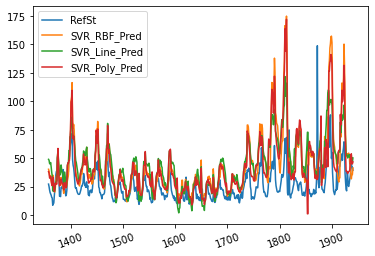

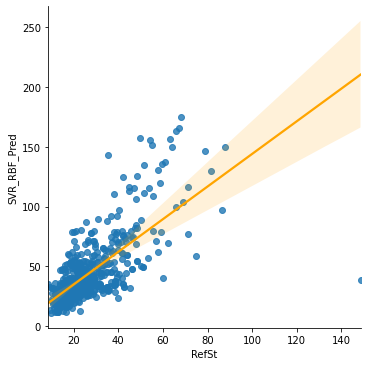

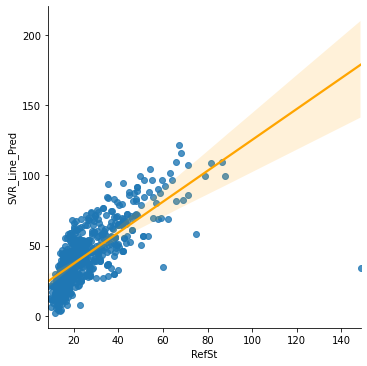

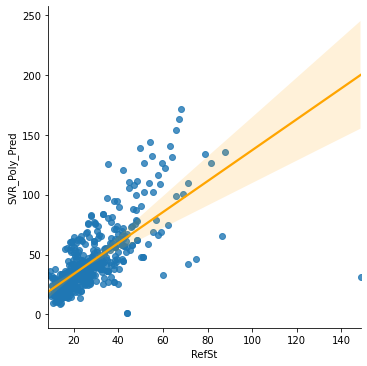

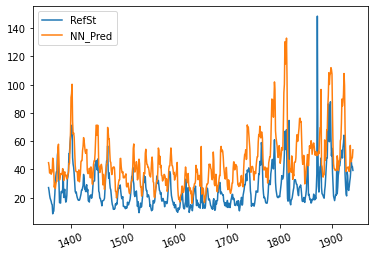

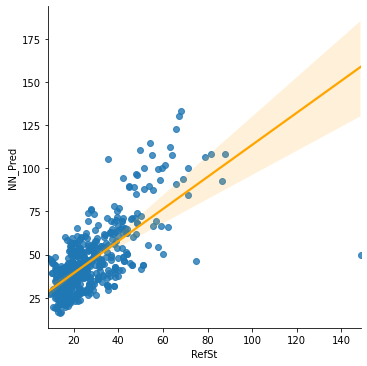

In [10]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Line_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "SVR_RBF_Pred", "SVR_Line_Pred", "SVR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Line_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Line_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Poly_Pred"])


# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
corr_lin = df_test["SVR_Line_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)
print("Correlation_corr_lin: ", corr_lin)

2.10.0
Epoch 1/750
136/136 [==============================] - 1s 3ms/step - loss: 1836.2931
Epoch 2/750
136/136 [==============================] - 0s 3ms/step - loss: 1022.3833
Epoch 3/750
136/136 [==============================] - 0s 3ms/step - loss: 965.8489
Epoch 4/750
136/136 [==============================] - 0s 3ms/step - loss: 953.5710
Epoch 5/750
136/136 [==============================] - 0s 2ms/step - loss: 916.3824
Epoch 6/750
136/136 [==============================] - 0s 3ms/step - loss: 903.3171
Epoch 7/750
136/136 [==============================] - 0s 2ms/step - loss: 879.7792
Epoch 8/750
136/136 [==============================] - 0s 2ms/step - loss: 873.1434
Epoch 9/750
136/136 [==============================] - 0s 2ms/step - loss: 877.1635
Epoch 10/750
136/136 [==============================] - 0s 2ms/step - loss: 861.4847
Epoch 11/750
136/136 [==============================] - 0s 2ms/step - loss: 853.5395
Epoch 12/750
136/136 [==============================] - 0s 2ms/st

136/136 [==============================] - 0s 2ms/step - loss: 770.8399
Epoch 98/750
136/136 [==============================] - 0s 2ms/step - loss: 776.5862
Epoch 99/750
136/136 [==============================] - 0s 2ms/step - loss: 777.1578
Epoch 100/750
136/136 [==============================] - 0s 2ms/step - loss: 758.7311
Epoch 101/750
136/136 [==============================] - 0s 2ms/step - loss: 777.1558
Epoch 102/750
136/136 [==============================] - 0s 2ms/step - loss: 774.1574
Epoch 103/750
136/136 [==============================] - 0s 2ms/step - loss: 768.3227
Epoch 104/750
136/136 [==============================] - 0s 2ms/step - loss: 765.7991
Epoch 105/750
136/136 [==============================] - 0s 2ms/step - loss: 767.1259
Epoch 106/750
136/136 [==============================] - 0s 2ms/step - loss: 776.8455
Epoch 107/750
136/136 [==============================] - 0s 2ms/step - loss: 764.8276
Epoch 108/750
136/136 [==============================] - 0s 2ms/step -

136/136 [==============================] - 0s 2ms/step - loss: 599.0295
Epoch 193/750
136/136 [==============================] - 0s 2ms/step - loss: 603.7357
Epoch 194/750
136/136 [==============================] - 0s 2ms/step - loss: 651.6393
Epoch 195/750
136/136 [==============================] - 0s 2ms/step - loss: 591.1711
Epoch 196/750
136/136 [==============================] - 0s 2ms/step - loss: 571.6072
Epoch 197/750
136/136 [==============================] - 0s 2ms/step - loss: 602.2698
Epoch 198/750
136/136 [==============================] - 0s 2ms/step - loss: 576.5965
Epoch 199/750
136/136 [==============================] - 0s 2ms/step - loss: 590.5997
Epoch 200/750
136/136 [==============================] - 0s 2ms/step - loss: 610.8574
Epoch 201/750
136/136 [==============================] - 0s 2ms/step - loss: 565.0411
Epoch 202/750
136/136 [==============================] - 0s 2ms/step - loss: 603.7793
Epoch 203/750
136/136 [==============================] - 0s 2ms/step

136/136 [==============================] - 0s 2ms/step - loss: 469.2942
Epoch 288/750
136/136 [==============================] - 0s 2ms/step - loss: 430.8240
Epoch 289/750
136/136 [==============================] - 0s 2ms/step - loss: 407.2262
Epoch 290/750
136/136 [==============================] - 0s 2ms/step - loss: 429.5549
Epoch 291/750
136/136 [==============================] - 0s 2ms/step - loss: 465.5790
Epoch 292/750
136/136 [==============================] - 0s 2ms/step - loss: 509.5210
Epoch 293/750
136/136 [==============================] - 0s 2ms/step - loss: 481.4767
Epoch 294/750
136/136 [==============================] - 0s 2ms/step - loss: 489.1018
Epoch 295/750
136/136 [==============================] - 0s 2ms/step - loss: 424.7245
Epoch 296/750
136/136 [==============================] - 0s 2ms/step - loss: 515.5389
Epoch 297/750
136/136 [==============================] - 0s 2ms/step - loss: 468.7879
Epoch 298/750
136/136 [==============================] - 0s 2ms/step

136/136 [==============================] - 0s 2ms/step - loss: 458.9181
Epoch 383/750
136/136 [==============================] - 0s 2ms/step - loss: 436.1301
Epoch 384/750
136/136 [==============================] - 0s 2ms/step - loss: 421.5201
Epoch 385/750
136/136 [==============================] - 0s 2ms/step - loss: 414.9925
Epoch 386/750
136/136 [==============================] - 0s 2ms/step - loss: 381.4537
Epoch 387/750
136/136 [==============================] - 0s 2ms/step - loss: 417.3548
Epoch 388/750
136/136 [==============================] - 0s 2ms/step - loss: 469.2188
Epoch 389/750
136/136 [==============================] - 0s 2ms/step - loss: 430.5816
Epoch 390/750
136/136 [==============================] - 0s 2ms/step - loss: 391.6013
Epoch 391/750
136/136 [==============================] - 0s 2ms/step - loss: 441.3983
Epoch 392/750
136/136 [==============================] - 0s 2ms/step - loss: 502.0157
Epoch 393/750
136/136 [==============================] - 0s 2ms/step

136/136 [==============================] - 0s 2ms/step - loss: 355.5614
Epoch 478/750
136/136 [==============================] - 0s 2ms/step - loss: 359.3847
Epoch 479/750
136/136 [==============================] - 0s 2ms/step - loss: 358.7640
Epoch 480/750
136/136 [==============================] - 0s 2ms/step - loss: 394.6351
Epoch 481/750
136/136 [==============================] - 0s 3ms/step - loss: 389.1768
Epoch 482/750
136/136 [==============================] - 0s 2ms/step - loss: 390.2243
Epoch 483/750
136/136 [==============================] - 0s 2ms/step - loss: 362.5865
Epoch 484/750
136/136 [==============================] - 0s 2ms/step - loss: 325.2064
Epoch 485/750
136/136 [==============================] - 0s 2ms/step - loss: 318.5710
Epoch 486/750
136/136 [==============================] - 0s 2ms/step - loss: 484.3369
Epoch 487/750
136/136 [==============================] - 0s 2ms/step - loss: 325.9147
Epoch 488/750
136/136 [==============================] - 0s 2ms/step

136/136 [==============================] - 0s 2ms/step - loss: 302.8169
Epoch 573/750
136/136 [==============================] - 0s 2ms/step - loss: 228.1540
Epoch 574/750
136/136 [==============================] - 0s 2ms/step - loss: 260.7096
Epoch 575/750
136/136 [==============================] - 0s 2ms/step - loss: 363.1145
Epoch 576/750
136/136 [==============================] - 0s 2ms/step - loss: 344.5032
Epoch 577/750
136/136 [==============================] - 0s 2ms/step - loss: 265.1608
Epoch 578/750
136/136 [==============================] - 0s 2ms/step - loss: 284.1620
Epoch 579/750
136/136 [==============================] - 0s 2ms/step - loss: 278.7797
Epoch 580/750
136/136 [==============================] - 0s 2ms/step - loss: 270.6138
Epoch 581/750
136/136 [==============================] - 0s 2ms/step - loss: 414.5657
Epoch 582/750
136/136 [==============================] - 0s 2ms/step - loss: 297.4120
Epoch 583/750
136/136 [==============================] - 0s 2ms/step

136/136 [==============================] - 0s 2ms/step - loss: 315.3699
Epoch 668/750
136/136 [==============================] - 0s 2ms/step - loss: 262.0410
Epoch 669/750
136/136 [==============================] - 0s 2ms/step - loss: 233.3388
Epoch 670/750
136/136 [==============================] - 0s 2ms/step - loss: 218.8795
Epoch 671/750
136/136 [==============================] - 0s 2ms/step - loss: 208.0517
Epoch 672/750
136/136 [==============================] - 0s 2ms/step - loss: 207.0343
Epoch 673/750
136/136 [==============================] - 0s 2ms/step - loss: 217.5464
Epoch 674/750
136/136 [==============================] - 0s 2ms/step - loss: 239.1052
Epoch 675/750
136/136 [==============================] - 0s 2ms/step - loss: 310.8185
Epoch 676/750
136/136 [==============================] - 0s 2ms/step - loss: 428.6246
Epoch 677/750
136/136 [==============================] - 0s 2ms/step - loss: 284.5409
Epoch 678/750
136/136 [==============================] - 0s 2ms/step

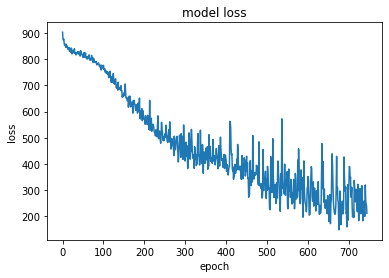

19/19 [==============================] - 0s 2ms/step
          RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1358  27.104773  82.135593  29.831818  57.736364  59.367853     55.268703   
1359  24.870444  80.610169  29.317778  58.651111  58.466720     54.390745   
1360  21.832051  74.084746  28.492308  61.571795  56.265816     51.581481   
1361  19.658500  74.525424  28.137500  61.082500  55.178838     51.021012   
1362  18.557105  77.644068  27.921053  60.610526  56.102418     52.325556   
...         ...        ...        ...        ...        ...           ...   
1936  39.858333  91.508475  40.686667  36.980000  62.117274     58.366758   
1937  45.188833  91.389831  43.206667  35.005000  64.882573     59.906594   
1938  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1939  41.998500  79.224138  42.481667  37.700000  59.037273     53.513899   
1940  39.270000  83.305085  39.293333  44.260000  63.141851     57.250199   

       KNN_Pred    RF_

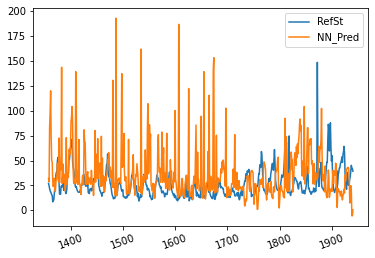

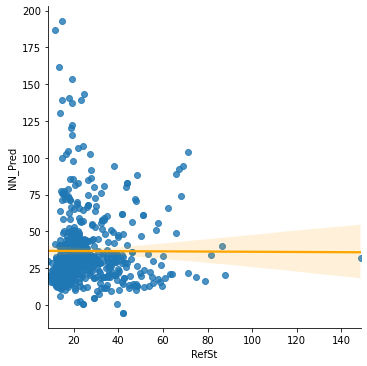

In [8]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 750)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)